In [1]:
import pandas as pd

In [2]:
df21 = pd.read_csv("data/2021_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df21.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques
100003097-SC;105 rue La Fayette E-O;100003097;105 rue La Fayette E-O;2.0;2021-01-01T00:00:00;;https://filer.eco-counter-tools.com/file/fb/bdbed9c19a1427089cd951893f252c5eb961b92f6d7321e83d1347a089b687fb/Q15G5037467_20210824141241.jpg;48.87773,2.3506
100003097-SC;105 rue La Fayette E-O;100003097;105 rue La Fayette E-O;3.0;2021-01-01T01:00:00;;https://filer.eco-counter-tools.com/file/fb/bdbed9c19a1427089cd951893f252c5eb961b92f6d7321e83d1347a089b687fb/Q15G5037467_20210824141241.jpg;48.87773,2.3506
100003097-SC;105 rue La Fayette E-O;100003097;105 rue La Fayette E-O;1.0;2021-01-01T02:00:00;;https://filer.eco-counter-tools.com/file/fb/bdbed9c19a1427089cd951893f252c5eb961b92f6d7321e83d1347a089b687fb/Q15G5037467_20210824141241.jpg;48.87773,2.3506
100003097-SC;105 rue La Fayette E-O;100003097;105 rue La Fayette E-O;5.0;2021-01-01T03:00:00;;https://filer.eco-counter-tools.com/file/fb/bdbed9c19a1427089cd951893f252c5eb961b92f6d7321e83d1347a089b687fb/Q15G5037467_20210824141241.jpg;48.87773,2.3506
100003097-SC;105 rue La Fayette E-O;100003097;105 rue La Fayette E-O;6.0;2021-01-01T04:00:00;;https://filer.eco-counter-tools.com/file/fb/bdbed9c19a1427089cd951893f252c5eb961b92f6d7321e83d1347a089b687fb/Q15G5037467_20210824141241.jpg;48.87773,2.3506


In [3]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df21 = pd.read_csv('data/2021_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df21.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,105 rue La Fayette E-O,2.0,2021-01-01T00:00:00,"48.87773,2.3506"
1,105 rue La Fayette E-O,3.0,2021-01-01T01:00:00,"48.87773,2.3506"
2,105 rue La Fayette E-O,1.0,2021-01-01T02:00:00,"48.87773,2.3506"
3,105 rue La Fayette E-O,5.0,2021-01-01T03:00:00,"48.87773,2.3506"
4,105 rue La Fayette E-O,6.0,2021-01-01T04:00:00,"48.87773,2.3506"


In [4]:
df21.shape

(1462920, 4)

In [5]:
# Séparer latitude et longitude
df21[['latitude', 'longitude']] = df21['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df21["Date et heure de comptage"] = pd.to_datetime(
    df21["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [6]:
df21_sortedbyplace = df21.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df21_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
52560,10 avenue de la Grande Armée SE-NO,0.0,2021-01-01 00:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
52561,10 avenue de la Grande Armée SE-NO,2.0,2021-01-01 01:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
52562,10 avenue de la Grande Armée SE-NO,0.0,2021-01-01 02:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
52563,10 avenue de la Grande Armée SE-NO,3.0,2021-01-01 03:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
52564,10 avenue de la Grande Armée SE-NO,0.0,2021-01-01 04:00:00+00:00,"48.874716,2.292439",48.874716,2.292439


In [8]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df21_sites = df21[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df21_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df21_sites

(75, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,105 rue La Fayette E-O,"48.87773,2.3506",48.87773,2.3506
8760,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.83521,2.33307
17520,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
26280,158 rue de Rivoli (Voie Bus),"48.8611449,2.3401251",48.8611449,2.3401251
35040,27 boulevard Diderot E-O,"48.846099,2.375456",48.846099,2.375456
43800,67 boulevard Voltaire SE-NO,"48.86149,2.37376",48.86149,2.37376
52560,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439
61320,7 avenue de la Grande Armée NO-SE,"48.87451,2.29215",48.87451,2.29215
70080,72 boulevard Voltaire NO-SE,"48.86155,2.37407",48.86155,2.37407
78840,89 boulevard de Magenta NO-SE,"48.87756,2.35535",48.87756,2.35535


In [9]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df21_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df21_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df21_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,105 rue La Fayette E-O,"48.87773,2.3506",48.877730,2.350600,10ème Ardt
8760,106 avenue Denfert Rochereau NE-SO,"48.83521,2.33307",48.835210,2.333070,14ème Ardt
17520,135 avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
26280,158 rue de Rivoli (Voie Bus),"48.8611449,2.3401251",48.861145,2.340125,1er Ardt
35040,27 boulevard Diderot E-O,"48.846099,2.375456",48.846099,2.375456,12ème Ardt
43800,67 boulevard Voltaire SE-NO,"48.86149,2.37376",48.861490,2.373760,11ème Ardt
52560,10 avenue de la Grande Armée SE-NO,"48.874716,2.292439",48.874716,2.292439,17ème Ardt
61320,7 avenue de la Grande Armée NO-SE,"48.87451,2.29215",48.874510,2.292150,16ème Ardt
70080,72 boulevard Voltaire NO-SE,"48.86155,2.37407",48.861550,2.374070,11ème Ardt
78840,89 boulevard de Magenta NO-SE,"48.87756,2.35535",48.877560,2.355350,10ème Ardt


In [10]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df21_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8611449,2.3401251; 48.86357,2.32203",48.8611449; 48.86357,2.3401251; 2.32203
1,2ème Ardt,"48.86377,2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502,2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372,2.35702; 48.85735,2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.851525,2.3432985; 48.8511307,2.3456784; 48.85013,2.35423; 48.8511307,2.3456784",48.851525; 48.8511307; 48.85013; 48.8511307,2.3432985; 2.3456784; 2.35423; 2.3456784
5,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
6,7ème Ardt,"48.86179,2.32014; 48.86282,2.31061; 48.86284,2.310345; 48.86288,2.31179",48.86179; 48.86282; 48.86284; 48.86288,2.32014; 2.31061; 2.310345; 2.31179
7,8ème Ardt,"48.869873,2.307419; 48.869831,2.307076; 48.86373,2.31973; 48.86378,2.32003; 48.86462,2.31444",48.869873; 48.869831; 48.86373; 48.86378; 48.86462,2.307419; 2.307076; 2.31973; 2.32003; 2.31444
8,10ème Ardt,"48.87773,2.3506; 48.87756,2.35535; 48.877726,2.354926; 48.87813,2.3497",48.87773; 48.87756; 48.877726; 48.87813,2.3506; 2.35535; 2.354926; 2.3497
9,11ème Ardt,"48.86149,2.37376; 48.86155,2.37407; 48.86077,2.37305; 48.860852,2.372279; 48.860528,2.388364; 48.860528,2.388364",48.86149; 48.86155; 48.86077; 48.860852; 48.860528; 48.860528,2.37376; 2.37407; 2.37305; 2.372279; 2.388364; 2.388364


In [11]:
df21.shape

(1462920, 6)

In [12]:
df21["Date et heure de comptage"] = pd.to_datetime(df21["Date et heure de comptage"], utc=True)
df21["Date et heure de comptage"] = df21["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df21["Date et heure de comptage"].min()
date_max = df21["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2021-01-01 01:00:00+01:00
Date la plus récente : 2022-01-01 00:00:00+01:00


In [13]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2021
mois = [f"2021-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df21_final)
for arr, df_arr in df21_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df21_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df21_temp_mensuel["arr_num"] = (
    df21_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df21_temp_mensuel = (
    df21_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2021_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df21_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df21_temp_mensuel)


✅ Data sauvegardée dans data/2021_temperature_mensuelle_moyenne_par_arrondissement.csv
   arrondissement   2021-01   2021-02   2021-03   2021-04   2021-05  \
0        1er Ardt  0.570497  2.606696  3.795833  5.146944  9.488038   
1       2ème Ardt  0.528360  2.563839  3.752285  5.105556  9.443817   
2       3ème Ardt  0.574731  2.612500  3.797849  5.150556  9.493011   
3       4ème Ardt  0.591398  2.691890  3.886089  5.249931  9.530242   
4       5ème Ardt  0.573858  2.671763  3.867272  5.229514  9.510988   
5       6ème Ardt  0.361156  2.452530  3.651210  5.014722  9.286828   
6       7ème Ardt  0.684476  2.720350  3.907762  5.258993  9.605880   
7       8ème Ardt  0.622473  2.658512  3.846129  5.198056  9.541613   
8      10ème Ardt  0.451008  2.487500  3.674832  5.029479  9.363710   
9      11ème Ardt  0.357392  2.475298  3.597760  4.930162  9.325134   
10     12ème Ardt  0.439673  2.636880  3.720565  5.129884  9.476098   
11     13ème Ardt  0.479988  2.632027  3.766114  5.153951  9.

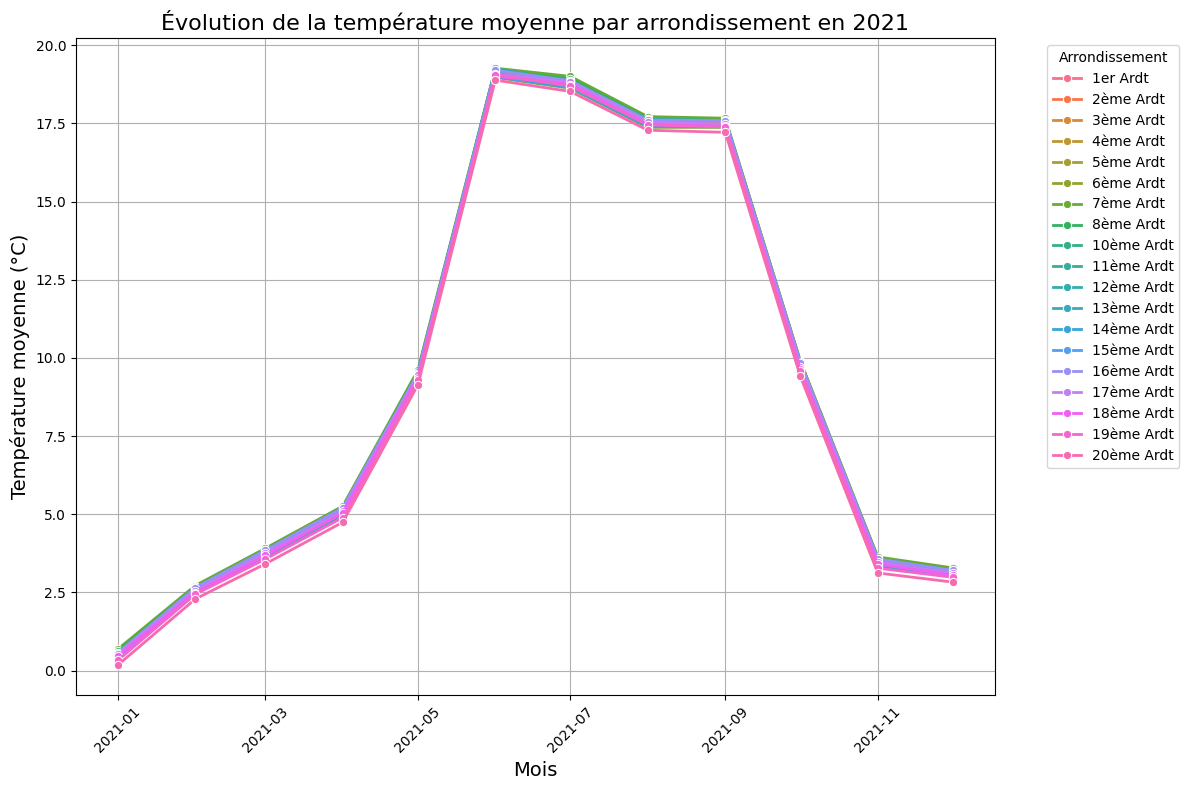

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2021_temperature_mensuelle_moyenne_par_arrondissement.csv"
df21_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df21_long = df21_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df21_long["mois"] = pd.to_datetime(df21_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df21_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2021', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2021
mois = [f"2021-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df21_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df21_precip_mensuel = pd.DataFrame(results_precip)
df21_precip_mensuel["arr_num"] = df21_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df21_precip_mensuel = df21_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2021_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df21_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df21_precip_mensuel)  # ou df21_precip_mensuel selon nom variable

Erreur pour 18ème Ardt, 2021-08, site 48.89594,2.35953 : HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Max retries exceeded with url: /v1/archive?latitude=48.89594&longitude=2.35953&start_date=2021-08-01&end_date=2021-08-31&hourly=precipitation&timezone=Europe/Paris (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1032)')))
✅ Data sauvegardée dans data/2021_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2021-01  2021-02  2021-03  2021-04  2021-05  2021-06  \
10       1er Ardt    203.8     91.2     74.2     56.8    150.8    191.0   
12      2ème Ardt    101.9     45.6     37.1     28.4     75.4     95.5   
13      3ème Ardt    101.9     45.6     37.1     28.4     75.4     95.5   
14      4ème Ardt    193.4    100.6     77.4     56.2    141.8    181.4   
15      5ème Ardt    386.8    201.2    154.8    112.4    283.6    362.8   
16      6ème Ardt     96.7     50.3     38.

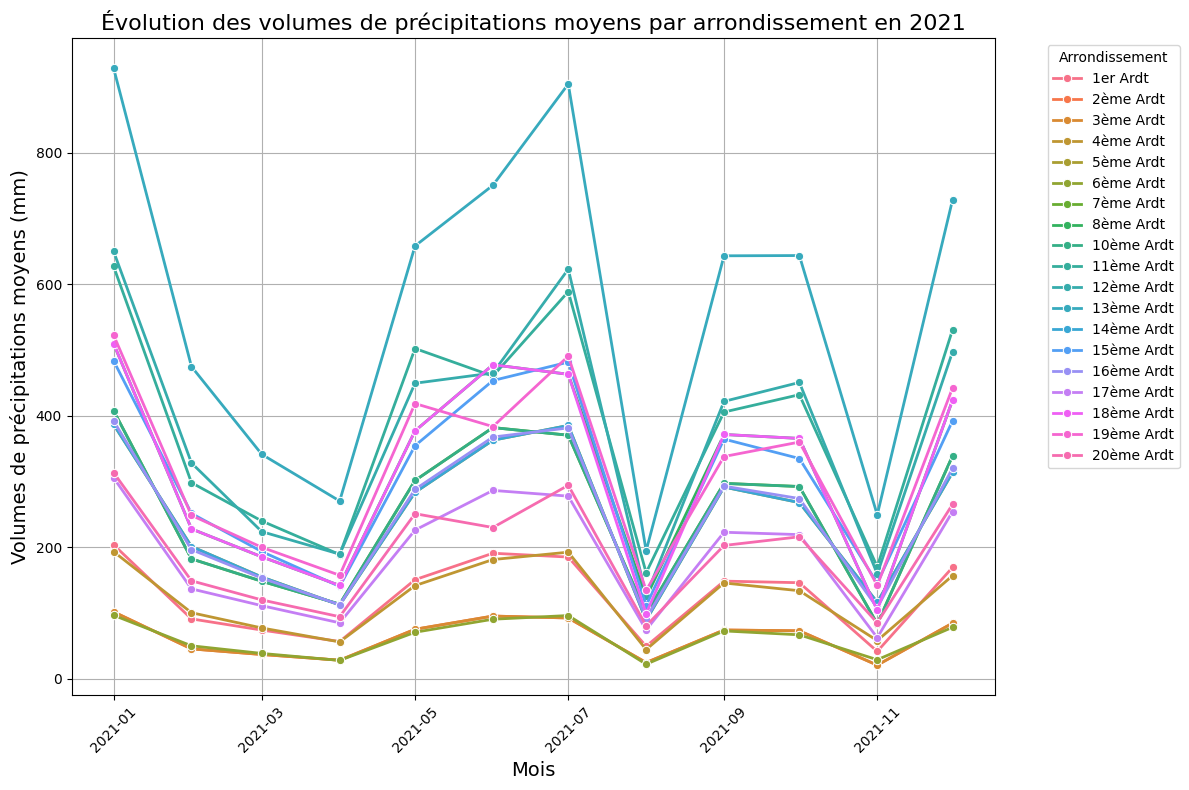

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2021_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df21_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df21_long = df21_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df21_long["mois"] = pd.to_datetime(df21_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df21_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2021', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2021
mois = [f"2021-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df21_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df21_cloud_mensuel = pd.DataFrame(results_cloud)
df21_cloud_mensuel["arr_num"] = df21_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df21_cloud_mensuel = df21_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2021_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df21_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df21_cloud_mensuel)


✅ Data sauvegardée dans data/2021_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2021-01    2021-02    2021-03    2021-04    2021-05  \
10       1er Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
12      2ème Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
13      3ème Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
14      4ème Ardt  81.803763  68.501488  53.303763  43.161111  62.268817   
15      5ème Ardt  81.803763  68.501488  53.303763  43.161111  62.268817   
16      6ème Ardt  81.803763  68.501488  53.303763  43.161111  62.268817   
17      7ème Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
18      8ème Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
0      10ème Ardt  82.331989  68.607143  53.510753  43.488889  62.489247   
1      11ème Ardt  82.642473  68.196429  53.950269  43.625000  62.682796   
2      12ème Ardt  81.909946  68.136905  53.642473  43.158333  62.196237   
3     

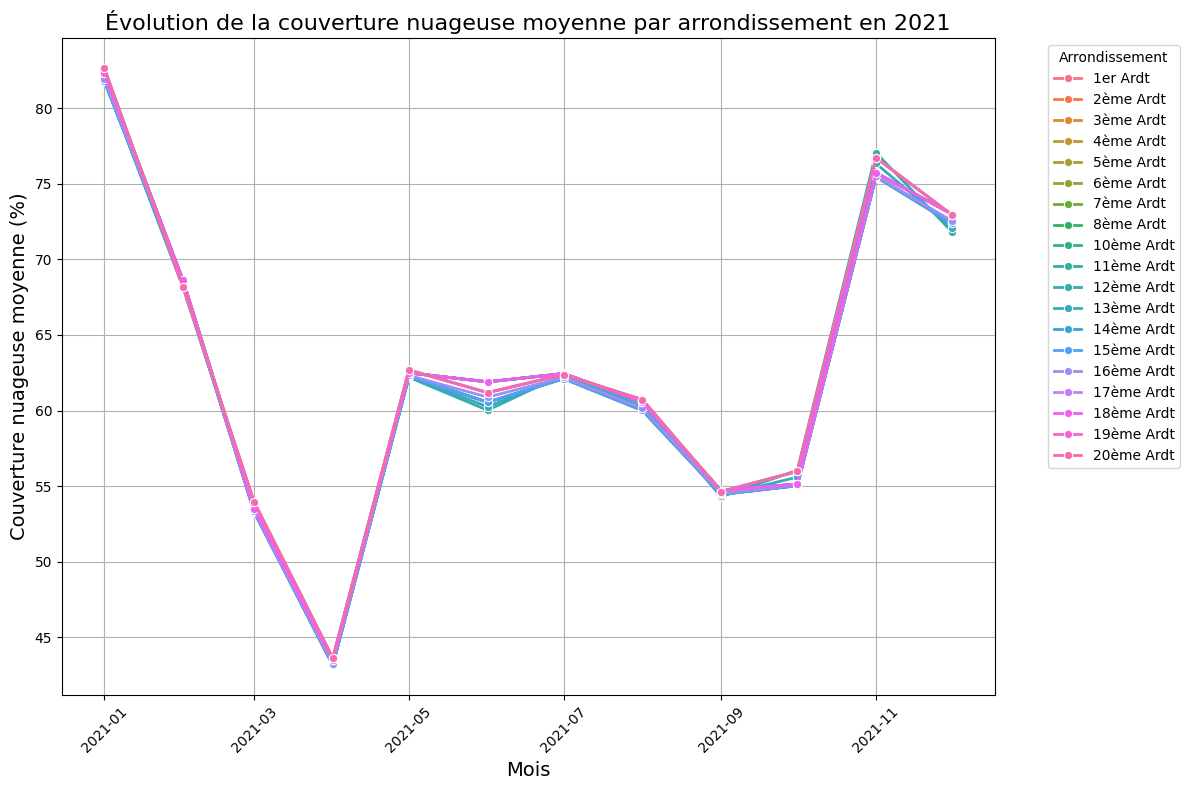

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2021_cloudcover_mensuel_moyen_par_arrondissement.csv"
df21_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df21_long = df21_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df21_long["mois"] = pd.to_datetime(df21_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df21_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2021', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
